In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
datos = pd.read_csv('data_HW2.csv', sep=',', header=0)
datos.head()
datos_array = np.array(datos)
datos_array

array([[-0.5062681 , -0.42567566],
       [-0.97443453,  0.77422953],
       [-0.92042341,  0.45011241],
       ...,
       [ 0.78465992,  0.34043133],
       [ 0.45417368,  0.0046307 ],
       [ 0.58427289,  0.00919931]])

a) Considere la función f (x, y) = x sin(πy) + x2 + y2. Realice sus gráficos 3D y de contorno para (x, y) ∈ [−1, 1] ×[−1, 1]. Para este último muestre al menos 20 niveles. A primera vista, ¿cerca de qué puntos podemos encontrar mínimos locales?

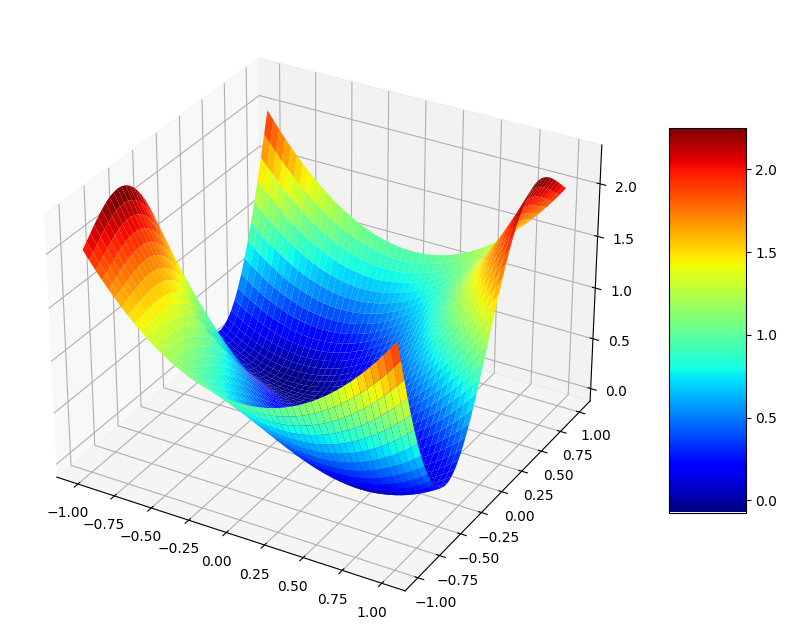

In [25]:
dom = np.linspace(-1, 1)
xx, yy = np.meshgrid(dom, dom)
f = lambda x, y: x*np.sin(np.pi*y)+x**2+y**2
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})
surf = ax.plot_surface(xx, yy, f(xx, yy), antialiased=True, cmap="jet")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Utilizando la librería matplotlib y geogebra, al ojo se logra apreciar que el mínimo local es #Introducir mínimo local#

b) Programe el método de descenso de gradiente (Algoritmo 2) para la función f presentada anteriormente, con criterio de parada ‖xk+1 −xk‖ ≤ 10^−12. Corra este algoritmo con puntos iniciales x0 = (1/2, −3/4)>^T, y x0 = (3/4, 0)>^T para tamaños de pasos ηk = 1/k para k ≥ 1. Reporte el número de pasos requeridos para cada punto inicial en alcanzar un mínimo local y grafique los puntos resultantes en el gráfico de contorno.

In [26]:
f = lambda x, y: x*np.sin(np.pi*y)+x**2+y**2

In [27]:
def gradiente_descendiente(x_k, epsilon = (10**(-12))):
    steps = [x_k]
    delta = 1
    k = 1
    while delta > epsilon:
        x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]),
                                    np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]]))
        delta = np.linalg.norm(x_k1 - x_k)
        x_k = x_k1
        k += 1
        steps.append(x_k)
    return k, x_k, steps

In [28]:
x_0 = np.array([1/2, -3/4])
pasos, x_k1, fxparcial = gradiente_descendiente(x_0)
print("El número de pasos es: ", pasos)
print("El mínimo se encuentra en: ", x_k1)
print("La gradiente es: ", np.array(fxparcial))

El número de pasos es:  86014
El mínimo se encuentra en:  [ 0.43534711 -0.33633012]
La gradiente es:  [[ 0.5        -0.75      ]
 [ 0.20710678  1.86072073]
 [ 0.21186472 -0.29467354]
 ...
 [ 0.43534711 -0.33633012]
 [ 0.43534711 -0.33633012]
 [ 0.43534711 -0.33633012]]


In [29]:
x_0_2 = np.transpose(np.array([3/4, 0]))
pasos_2, x_k1_2, fxparcial_2 = gradiente_descendiente(x_0_2)
print("El número de pasos es: ", pasos_2)
print("El mínimo se encuentra en: ", x_k1_2)
print("La gradiente es: ", np.array(fxparcial_2))

El número de pasos es:  140529
El mínimo se encuentra en:  [-0.43534708  0.33633011]
La gradiente es:  [[ 0.75        0.        ]
 [-0.75       -2.35619449]
 [ 0.44983608  0.51431737]
 ...
 [-0.43534708  0.33633011]
 [-0.43534708  0.33633011]
 [-0.43534708  0.33633011]]


Para el punto (1/2, -3/4) se realizaron un total de 86.014 pasos, mientras que para el punto (3/4, 0) se realizaron un total de 140.529 pasos.

# Graficamos:

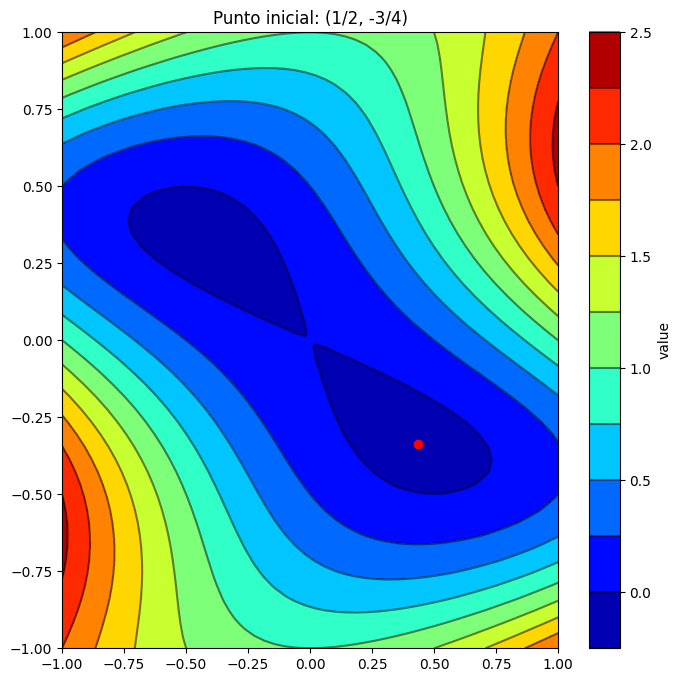

In [30]:
# Gráfico punto inicial (1/2, -3/4)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (1/2, -3/4)')
plt.scatter(np.array(x_k1[0]), np.array(x_k1[1]), color='r', marker='o')
plt.show()

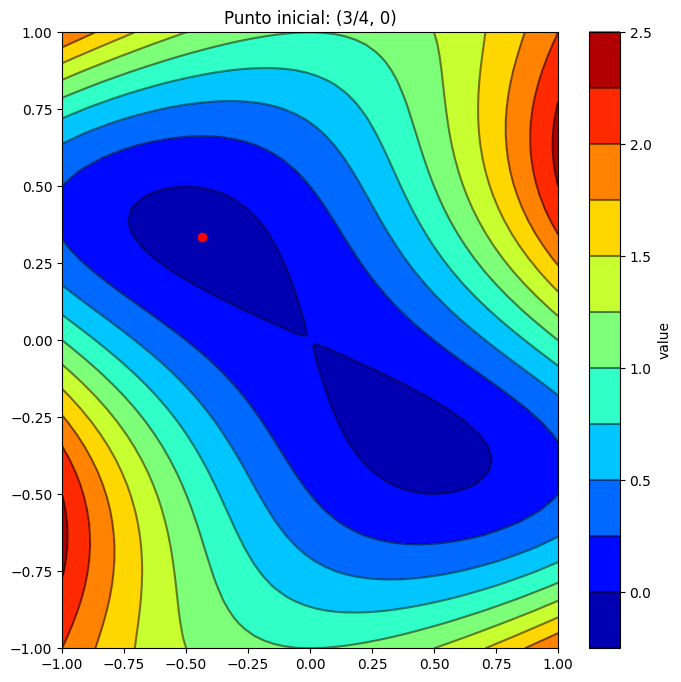

In [31]:
# Gráfico punto inicial (3/4, 0)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (3/4, 0)')
plt.scatter(np.array(x_k1_2[0]), np.array(x_k1_2[1]), color='r', marker='o')
plt.show()

c) Considere la siguiente modificación al algoritmo presentado, para alpha perteneciente al intervalo [0,1]:

$$x_{k+1} \leftarrow x_k - n_k \nabla f(x_k) + \alpha\Delta x_k, \Delta x_k := x_k - x_{k-1}$$

desde la segunda iteración en adelante. Programe el algoritmo con esta modificación yreporte nuevamente todo lo de la pregunta anterior para un valor α = 0.5 y el mismo η_k utilizado anteriormente. ¿Cómo se comparan estos resultados con los obtenidos para el algoritmo clásico?

In [32]:
def gradiente_descendiente_variada(x_k, epsilon=(10**(-12))):
    steps = [x_k]
    delta = 1
    k = 1
    alpha = 0.5
    while delta > epsilon:
        x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]),
                                np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]]))
        delta_x = x_k - steps[-2] if k > 1 else np.zeros_like(x_k)
        x_k1 = x_k1 + alpha * delta_x
        delta = np.linalg.norm(x_k1 - x_k)
        x_k = x_k1
        k += 1
        steps.append(x_k)
    return k, x_k, steps


In [33]:
x_0 = np.array([1/2, -3/4])
pasos, x_k1, fxparcial = gradiente_descendiente_variada(x_0)
print("El número de pasos es: ", pasos)
print("El mínimo se encuentra en: ", x_k1)
print("La gradiente es: ", np.array(fxparcial))

El número de pasos es:  1534
El mínimo se encuentra en:  [ 0.43534717 -0.33633014]
La gradiente es:  [[ 0.5        -0.75      ]
 [ 0.20710678  1.86072073]
 [ 0.06541811  1.01068682]
 ...
 [ 0.43534717 -0.33633014]
 [ 0.43534717 -0.33633014]
 [ 0.43534717 -0.33633014]]


In [34]:
x_0_2 = np.transpose(np.array([3/4, 0]))
pasos_2, x_k1_2, fxparcial_2 = gradiente_descendiente_variada(x_0_2)
print("El número de pasos es: ", pasos_2)
print("El mínimo se encuentra en: ", x_k1_2)
print("La gradiente es: ", np.array(fxparcial_2))

El número de pasos es:  2128
El mínimo se encuentra en:  [-0.43534717  0.33633014]
La gradiente es:  [[ 0.75        0.        ]
 [-0.75       -2.35619449]
 [-0.30016392 -0.66377988]
 ...
 [-0.43534717  0.33633014]
 [-0.43534717  0.33633014]
 [-0.43534717  0.33633014]]


Para esta ocación, aplicando la variación al algoritmo presentado, se obtuvo un total de 1.534 pasos para el punto (1/2, -3/4) y de 2.128 pasos para el punto (3/4, 0), por lo que se puede apreciar que el algoritmo modificado es mucho más eficiente para ambos puntos, realizando una menor cantidad de pasos para llegar al mínimo local.

# Graficamos:

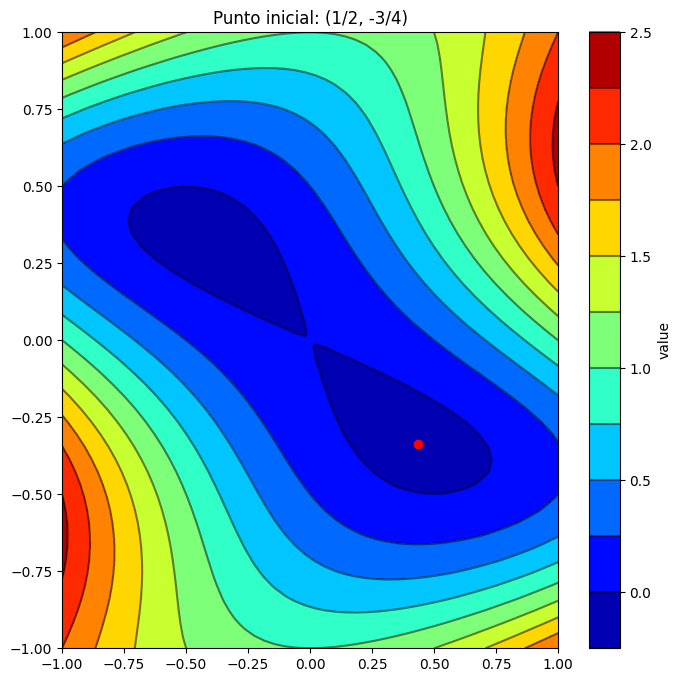

In [35]:
# Gráfico punto inicial (1/2, -3/4)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (1/2, -3/4)')
plt.scatter(np.array(x_k1[0]), np.array(x_k1[1]), color='r', marker='o')
plt.show()

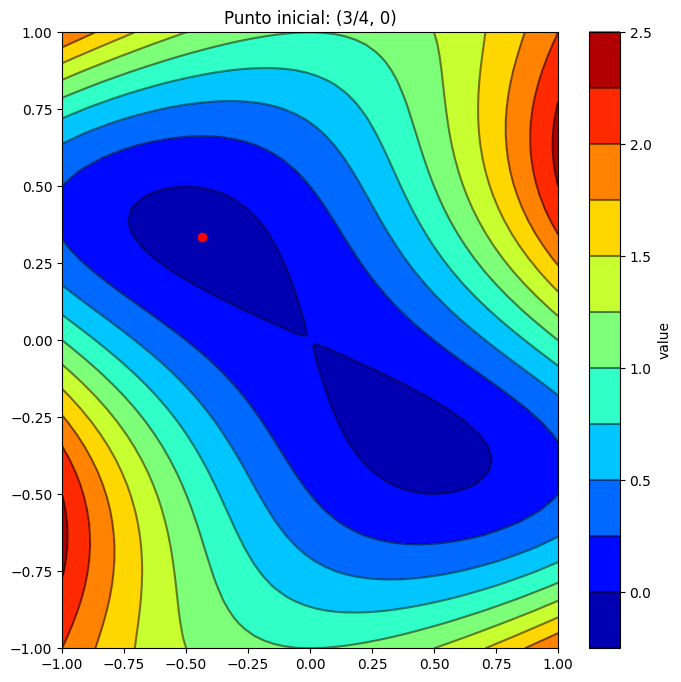

In [36]:
# Gráfico punto inicial (3/4, 0)

fig = plt.figure(figsize=(8, 8))
CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')
CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)
plt.title('Punto inicial: (3/4, 0)')
plt.scatter(np.array(x_k1_2[0]), np.array(x_k1_2[1]), color='r', marker='o')
plt.show()

d) Descenso de gradiente estocástico:

1. Implementamos la función 'L' que calcula el valor de pérdida para un punto (x,y) y un valor de theta.

In [37]:
def L(theta, dato):
    gradiente = np.array([2*(theta[0]*dato[0]**2 + theta[1]*dato[1] + theta[2] - dato[1])*dato[0]**2,
                            2*(theta[0]*dato[0]**2 + theta[1]*dato[1] + theta[2] - dato[1])*dato[1],
                            2*(theta[0]*dato[0]**2 + theta[1]*dato[1] + theta[2] - dato[1])])
    return gradiente

In [38]:
def descenso_de_gradiente_estocastico(theta_0, datos):
    historial = [theta_0]
    theta_1 = theta_0
    for i in range(1, len(datos) + 1):
        theta_k_1 = historial[-1] - 1/i*L(historial[-1], datos[i-1])
        historial.append(theta_k_1)
    return theta_k_1, historial

In [39]:
# ejecutamos la función con los datos en 100 ordenes distintos
theta_0 = np.array([0, 0, 0])
theta_k_1, historial_theta = descenso_de_gradiente_estocastico(theta_0, datos_array)
theta_k_1

array([ 0.24068625,  0.82045846, -0.09978595])

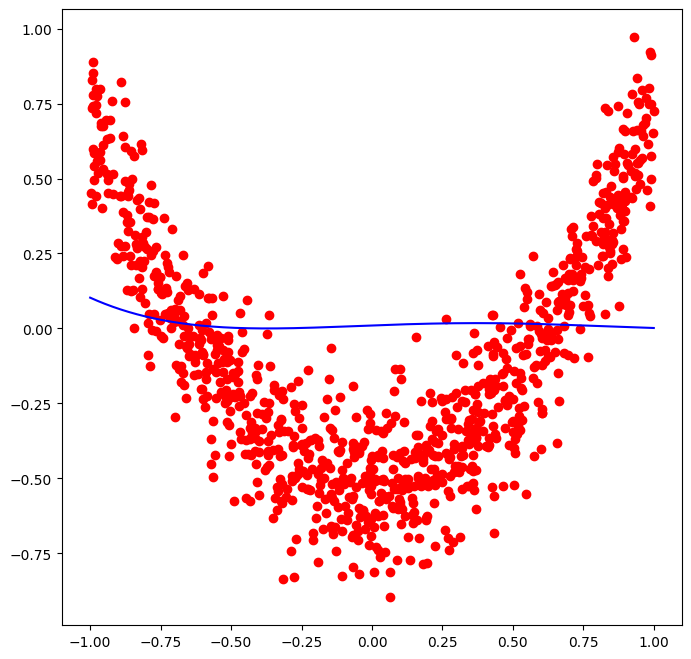

In [40]:
# grafica vector resultante y los datos
fig = plt.figure(figsize=(8, 8))
plt.scatter(datos_array[:, 0], datos_array[:, 1], color='r', marker='o')
x = np.linspace(-1, 1, len(datos_array))
plt.plot(x, (theta_k_1[0]*(x**2) + theta_k_1[1]*x + theta_k_1[2] - x)**2, color='b')
plt.show()

In [41]:
historial_theta

[array([0, 0, 0]),
 array([-0.21820763,  0.36239954, -0.85135133]),
 array([1.25563527, 1.5641536 , 0.70084219]),
 array([ 0.11560147,  0.95844546, -0.64483973]),
 array([ 0.11560683,  0.76146251, -0.3356583 ]),
 array([ 0.2226978 ,  0.81642403, -0.19925447]),
 array([ 0.235677  ,  0.81565745, -0.17566072]),
 array([ 0.24286991,  0.81357087, -0.15652332]),
 array([ 0.24294225,  0.80547543, -0.13590575]),
 array([ 0.24829885,  0.80726363, -0.12482273]),
 array([ 0.24865039,  0.80530035, -0.12025693]),
 array([ 0.24913443,  0.80540104, -0.1193843 ]),
 array([ 0.25012147,  0.80422934, -0.11390667]),
 array([ 0.25170952,  0.8037253 , -0.1058403 ]),
 array([ 0.24767863,  0.80150612, -0.11010713]),
 array([ 0.2477114 ,  0.80119343, -0.10943934]),
 array([ 0.25191994,  0.80460149, -0.10367881]),
 array([ 0.25207997,  0.80458441, -0.10324214]),
 array([ 0.25272783,  0.80508526, -0.10256877]),
 array([ 0.25273888,  0.80411212, -0.10015071]),
 array([ 0.25115218,  0.80345326, -0.10237307]),
 arr